In [1]:
"""
copyright: abhirup.ghosh.184098@gmail.com
"""

# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from matplotlib.gridspec import GridSpec
import geopandas as gpd

import matplotlib as mpl
import seaborn as sns

import matplotlib.image as mpimg
import imageio

import os

In [2]:
wards = gpd.read_file('../data/KOL_WARDS/kolkata_wards.shp')
roads = gpd.read_file('../data/eastern-zone-latest-free.shp/gis_osm_roads_free_1.shp')

In [3]:
kol_limits = [[88.2, 88.5], [22.4, 22.7]]

In [4]:
roads_kol = roads[roads.geometry.bounds.minx.between(kol_limits[0][0],kol_limits[0][1])]

roads_kol = roads_kol[roads_kol.geometry.bounds.maxx.between(kol_limits[0][0],kol_limits[0][1])]
roads_kol = roads_kol[roads_kol.geometry.bounds.miny.between(kol_limits[1][0],kol_limits[1][1])]
roads_kol = roads_kol[roads_kol.geometry.bounds.maxy.between(kol_limits[1][0],kol_limits[1][1])]

In [5]:
roads_kol.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 78025 entries, 133 to 1333610
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osm_id    78025 non-null  object  
 1   code      78025 non-null  int64   
 2   fclass    78025 non-null  object  
 3   name      3306 non-null   object  
 4   ref       432 non-null    object  
 5   oneway    78025 non-null  object  
 6   maxspeed  78025 non-null  int64   
 7   layer     78025 non-null  int64   
 8   bridge    78025 non-null  object  
 9   tunnel    78025 non-null  object  
 10  geometry  78025 non-null  geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 7.1+ MB


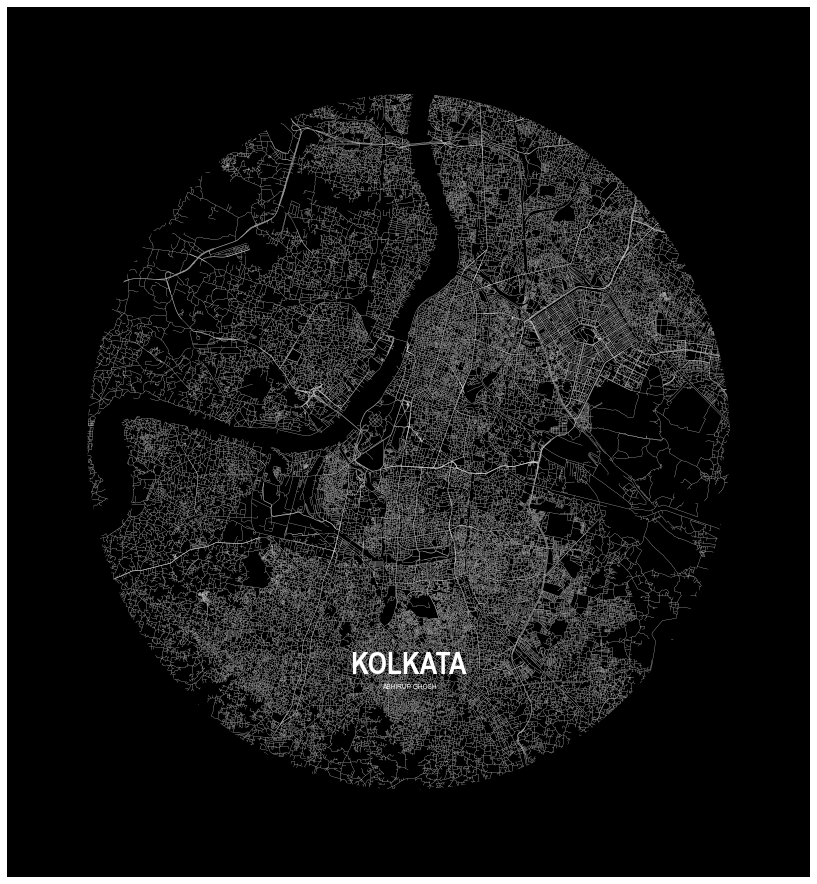

In [6]:
kol_limits = [[88.2, 88.5], [22.4, 22.7]]

x0 = kol_limits[0][0] + (kol_limits[0][1] - kol_limits[0][0])/2
y0 = kol_limits[1][0] + (kol_limits[1][1] - kol_limits[1][0])/2

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,16))
cs = roads_kol.plot(ax=ax, linewidth=0.25, edgecolor='w')

circ = patches.Circle((x0,y0), 0.12, transform=ax.transData)
for coll in cs.collections:
    coll.set_clip_path(circ)

ax.set_facecolor('k')
ax.set_xlim(kol_limits[0])
ax.set_ylim(kol_limits[1])

ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.text(x0,y0-0.08, 'KOLKATA', fontsize=30, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            fontweight='bold',
                            ha='center')

ax.text(x0,y0-0.085, 'ABHIRUP GHOSH', fontsize=8, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            #fontweight='bold',
                            ha='center', alpha=1)

plt.savefig("/Users/abhirupghosh/Desktop/output.png", dpi=300)                                                  

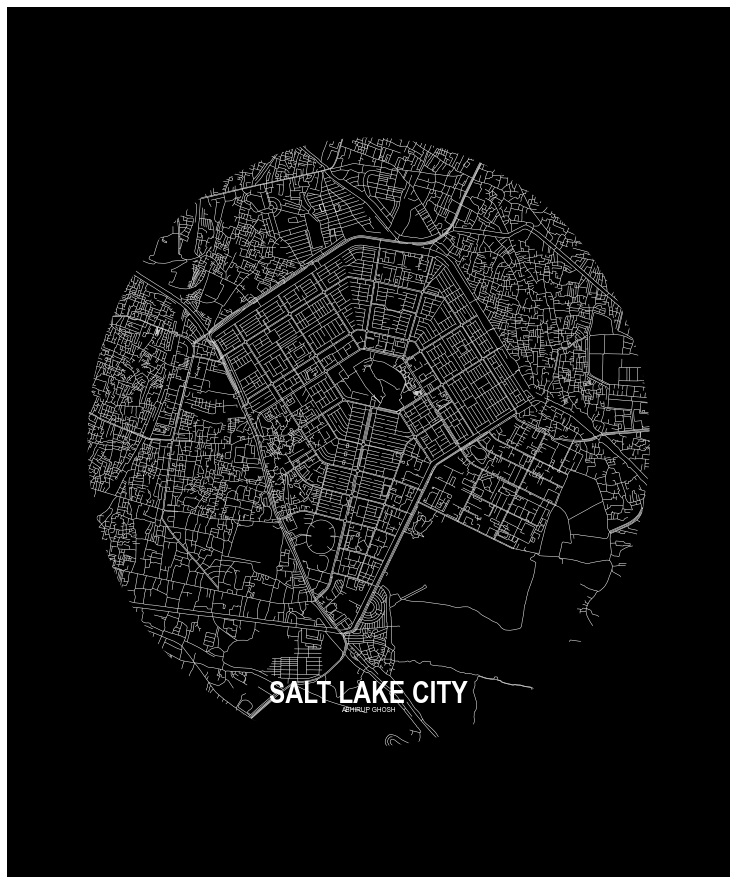

In [7]:
kol_limits = [[88.37, 88.46], [22.53, 22.63]]

x0 = kol_limits[0][0] + (kol_limits[0][1] - kol_limits[0][0])/2
y0 = kol_limits[1][0] + (kol_limits[1][1] - kol_limits[1][0])/2

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,16))
cs = roads_kol.plot(ax=ax, linewidth=0.5, edgecolor='w')

circ = patches.Circle((x0,y0), 0.035, transform=ax.transData)
for coll in cs.collections:
    coll.set_clip_path(circ)

ax.set_facecolor('k')
ax.set_xlim(kol_limits[0])
ax.set_ylim(kol_limits[1])

ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.text(x0,y0-0.03, 'SALT LAKE CITY', fontsize=30, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            fontweight='bold',
                            ha='center')

ax.text(x0,y0-0.031, 'ABHIRUP GHOSH', fontsize=8, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            #fontweight='bold',
                            ha='center', alpha=1)

plt.savefig("/Users/abhirupghosh/Desktop/output1.png", dpi=300)                              

In [51]:
"""kol_limits = [[88.38, 88.42], [22.572, 22.612]]

x0 = kol_limits[0][0] + (kol_limits[0][1] - kol_limits[0][0])/2
y0 = kol_limits[1][0] + (kol_limits[1][1] - kol_limits[1][0])/2

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,16))
cs = roads_kol.plot(ax=ax, linewidth=0.5, edgecolor='w')

circ = patches.Circle((x0,y0), 0.017, transform=ax.transData)
for coll in cs.collections:
    coll.set_clip_path(circ)

ax.set_facecolor('k')
ax.set_xlim(kol_limits[0])
ax.set_ylim(kol_limits[1])

ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.plot(x0+0.0005, y0+0.0008, 'X', color='r', ms=20)

ax.text(x0,y0+0.01, 'P  .  A  .  R  .  T  .  A  .  Y', fontsize=40, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            fontweight='bold',
                            ha='center')


ax.text(x0,y0-0.01, 'JANUARY 15, 7PM', fontsize=40, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            fontweight='bold',
                            ha='center')

ax.text(x0,y0-0.011, 'AC-95', fontsize=30, color='w', 
                            #fontstretch='ultra-expanded', 
                            fontfamily='Arial Narrow', 
                            #fontweight='bold',
                            ha='center', style='italic')

plt.tight_layout()
plt.savefig("/Users/abhirupghosh/Desktop/output2.png", dpi=300, facecolor='k')    """                          

'kol_limits = [[88.38, 88.42], [22.572, 22.612]]\n\nx0 = kol_limits[0][0] + (kol_limits[0][1] - kol_limits[0][0])/2\ny0 = kol_limits[1][0] + (kol_limits[1][1] - kol_limits[1][0])/2\n\nimport matplotlib.patches as patches\n\nfig, ax = plt.subplots(figsize=(16,16))\ncs = roads_kol.plot(ax=ax, linewidth=0.5, edgecolor=\'w\')\n\ncirc = patches.Circle((x0,y0), 0.017, transform=ax.transData)\nfor coll in cs.collections:\n    coll.set_clip_path(circ)\n\nax.set_facecolor(\'k\')\nax.set_xlim(kol_limits[0])\nax.set_ylim(kol_limits[1])\n\nax.spines[[\'left\', \'right\', \'top\', \'bottom\']].set_visible(False)\nax.set_xticks([])\nax.set_yticks([])\n\nax.plot(x0+0.0005, y0+0.0008, \'X\', color=\'r\', ms=20)\n\nax.text(x0,y0+0.01, \'P  .  A  .  R  .  T  .  A  .  Y\', fontsize=40, color=\'w\', \n                            #fontstretch=\'ultra-expanded\', \n                            fontfamily=\'Arial Narrow\', \n                            fontweight=\'bold\',\n                            ha=\'ce